In [2]:
#Importing libraries
import pandas as pd
import numpy as np

In [3]:
givenDataset=pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')
#Importing dataset
givenDataset['CRASH_DATE'] = pd.to_datetime(givenDataset['CRASH_DATE'])
#Converting 'CRASH_DATE' column to datetime format
filteredDataByYears = givenDataset[(givenDataset['CRASH_DATE'] >= '2017-05-01') & (givenDataset['CRASH_DATE'] <= '2019-04-30')]
#Filtering the dataset with given dates


C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\91119390.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  givenDataset=pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')


In [4]:
vehicleTypes=filteredDataByYears[filteredDataByYears['VEHICLE_MAKE'].str.contains("""FORD|HOND|VOLK|KW""",regex=True,na=False)]
#Filtering the dataset with given vehicle names

In [5]:
vehicleTypes

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
8121,16909020,4011012,2018-05-17,0:00,56eb5a90-ce78-4877-8329-a5fa03a5aded,NY,Pick-up Truck,FORD -CAR/SUV,NaN,2015.0,...,Making Left Turn,Right Front Bumper,Right Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
37862,16698070,3906195,2018-05-22,8:35,19d19578-eda7-499b-9b15-9ede4573c1e7,NY,Sedan,FORD -CAR/SUV,NaN,2011.0,...,Going Straight Ahead,Right Front Bumper,Right Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
49767,16705576,3910142,2018-05-22,14:30,21962dc2-3dc1-4f7f-ac0e-1a59fff5a693,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2007.0,...,Other*,Center Back End,No Damage,NaN,NaN,NaN,N,NaN,Backing Unsafely,Driver Inattention/Distraction
58698,16691486,3903253,2018-05-17,16:00,a68ea036-8ef7-4248-86f3-8b4a87a9a16f,NY,Station Wagon/Sport Utility Vehicle,HOND -CAR/SUV,NaN,2011.0,...,Entering Parked Position,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Driver Inexperience,Backing Unsafely
62342,16785387,3885452,2018-04-19,8:10,8800da52-be77-4d86-a19e-91a2aca1fda1,NY,Sedan,HOND -CAR/SUV,NaN,2017.0,...,Making Left Turn,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Reaction to Uninvolved Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659466,20074286,3662253,2017-05-02,21:39,5726c40f-a03f-43c2-bac7-a37caa334d35,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2008.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,Right Rear Quarter Panel,Right Rear Bumper,N,NaN,Other Vehicular,Unspecified
3659742,20074294,3992771,2018-10-01,7:30,2bf0e402-ede6-4d2f-a6eb-485e88d56547,NJ,Sedan,HOND -CAR/SUV,NaN,2014.0,...,Going Straight Ahead,Right Side Doors,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3659846,20073947,3834053,2018-01-20,1:00,277f32d6-98de-400d-ae94-2f3d80356602,NY,Sedan,FORD -CAR/SUV,NaN,2011.0,...,Parked,Left Front Bumper,Left Front Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3672798,20088511,3869923,2018-03-26,0:06,cb31ce16-b0da-4def-a97b-614afd59b4ab,NY,Sedan,FORD -CAR/SUV,NaN,2017.0,...,Going Straight Ahead,Center Front End,Right Front Bumper,Left Front Bumper,NaN,NaN,N,NaN,Unspecified,Unspecified


In [6]:
#Function for modifying vehicle names
import re
def Modify_names(vehicle_name):
  if re.search('.*FORD.*',vehicle_name):
    return 'FORD'
  elif re.search('.*HOND.*',vehicle_name):
    return 'HOND'
  elif re.search('.*VOLK.*',vehicle_name):
    return 'VOLK'
  elif re.search('.*KW.*',vehicle_name):
    return 'KW'
  else:
    return vehicle_name
#Applying the above written function on the data frame
vehicleTypes['VEHICLE_MAKE']= vehicleTypes['VEHICLE_MAKE'].apply(Modify_names)

C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\2077455971.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicleTypes['VEHICLE_MAKE']= vehicleTypes['VEHICLE_MAKE'].apply(Modify_names)


In [7]:
#unique vehicle names
vehicleTypes.VEHICLE_MAKE.unique()

array(['FORD', 'HOND', 'KW', 'VOLK'], dtype=object)

In [8]:
vehicleTypes

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
8121,16909020,4011012,2018-05-17,0:00,56eb5a90-ce78-4877-8329-a5fa03a5aded,NY,Pick-up Truck,FORD,NaN,2015.0,...,Making Left Turn,Right Front Bumper,Right Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
37862,16698070,3906195,2018-05-22,8:35,19d19578-eda7-499b-9b15-9ede4573c1e7,NY,Sedan,FORD,NaN,2011.0,...,Going Straight Ahead,Right Front Bumper,Right Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
49767,16705576,3910142,2018-05-22,14:30,21962dc2-3dc1-4f7f-ac0e-1a59fff5a693,NY,Station Wagon/Sport Utility Vehicle,FORD,NaN,2007.0,...,Other*,Center Back End,No Damage,NaN,NaN,NaN,N,NaN,Backing Unsafely,Driver Inattention/Distraction
58698,16691486,3903253,2018-05-17,16:00,a68ea036-8ef7-4248-86f3-8b4a87a9a16f,NY,Station Wagon/Sport Utility Vehicle,HOND,NaN,2011.0,...,Entering Parked Position,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Driver Inexperience,Backing Unsafely
62342,16785387,3885452,2018-04-19,8:10,8800da52-be77-4d86-a19e-91a2aca1fda1,NY,Sedan,HOND,NaN,2017.0,...,Making Left Turn,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Reaction to Uninvolved Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659466,20074286,3662253,2017-05-02,21:39,5726c40f-a03f-43c2-bac7-a37caa334d35,NY,Station Wagon/Sport Utility Vehicle,FORD,NaN,2008.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,Right Rear Quarter Panel,Right Rear Bumper,N,NaN,Other Vehicular,Unspecified
3659742,20074294,3992771,2018-10-01,7:30,2bf0e402-ede6-4d2f-a6eb-485e88d56547,NJ,Sedan,HOND,NaN,2014.0,...,Going Straight Ahead,Right Side Doors,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3659846,20073947,3834053,2018-01-20,1:00,277f32d6-98de-400d-ae94-2f3d80356602,NY,Sedan,FORD,NaN,2011.0,...,Parked,Left Front Bumper,Left Front Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3672798,20088511,3869923,2018-03-26,0:06,cb31ce16-b0da-4def-a97b-614afd59b4ab,NY,Sedan,FORD,NaN,2017.0,...,Going Straight Ahead,Center Front End,Right Front Bumper,Left Front Bumper,NaN,NaN,N,NaN,Unspecified,Unspecified


In [9]:
#Extracting columns required for the analysis
problemOneDataset=vehicleTypes[['CRASH_DATE','VEHICLE_MAKE']]
#Converting the 'CRASH_DATE' column to datetime format
problemOneDataset['CRASH_DATE'] = pd.to_datetime(problemOneDataset['CRASH_DATE'])
#Extracting year from 'CRASH_DATE' column
problemOneDataset['YEAR'] = problemOneDataset['CRASH_DATE'].dt.year


C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\1832692029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problemOneDataset['CRASH_DATE'] = pd.to_datetime(problemOneDataset['CRASH_DATE'])
C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\1832692029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problemOneDataset['YEAR'] = problemOneDataset['CRASH_DATE'].dt.year


In [10]:
#Using groupby function to group data by year and vehicle_make
analysisOneDataset=problemOneDataset.groupby(['YEAR','VEHICLE_MAKE']).agg({'VEHICLE_MAKE': np.size})
#Renaming column 
analysisOneDataset.rename(columns={'VEHICLE_MAKE' :'numberOfAccidents'},inplace=True)
#Converting multiindex to columns
analysisOneDataset=analysisOneDataset.reset_index()
#creating a list for vehicle_make
vehicleNames = analysisOneDataset.VEHICLE_MAKE.unique().tolist()
#creating lists for count of accidents occurred in each year
accidents_2017=analysisOneDataset[analysisOneDataset["YEAR"]==2017].numberOfAccidents.tolist()
accidents_2018=analysisOneDataset[analysisOneDataset["YEAR"]==2018].numberOfAccidents.tolist()
accidents_2019=analysisOneDataset[analysisOneDataset["YEAR"]==2019].numberOfAccidents.tolist()

Plotting bar chart

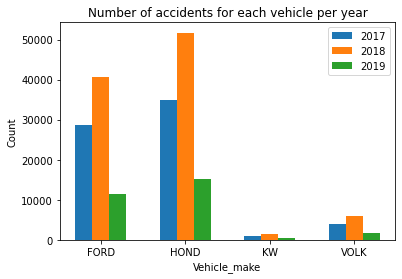

In [11]:
#importing matplotlib 
import matplotlib.pyplot as plt 
X_axis = np.arange(len(vehicleNames)) 
plt.bar(X_axis +0,  accidents_2017, 0.2, 
	label = '2017')
plt.bar(X_axis + 0.2,  accidents_2018, 0.2, 
	label = '2018')
plt.bar(X_axis + 0.4,  accidents_2019, 0.2, 
	label = '2019') 
plt.xticks(X_axis+0.2, vehicleNames)
plt.xlabel("Vehicle_make")
plt.ylabel("Count")
plt.title("Number of accidents for each vehicle per year")
plt.legend()
plt.show()


In [12]:
#Using groupby function to get number of accidents for each year.
totalAccidents=vehicleTypes.groupby(['VEHICLE_MAKE']).agg({'VEHICLE_MAKE': np.size})

In [13]:
totalAccidents

,VEHICLE_MAKE
VEHICLE_MAKE,
FORD,80708
HOND,101960
KW,2823
VOLK,11588


In [14]:
#Finding the vehicle make which caused majority of the accidents
totalAccidents.index[totalAccidents['VEHICLE_MAKE']==totalAccidents.max()[0]][0]

'HOND'

In [15]:
#Finding the vehicle make which caused manimum accidents
totalAccidents.index[totalAccidents['VEHICLE_MAKE']==totalAccidents.min()[0]][0]

'KW'

In [16]:
#Creating a dataset for analysis two
problemTwoDataset=vehicleTypes[['CRASH_DATE','VEHICLE_MAKE']]
#Converting CRASH_DATE column to date time format
problemTwoDataset['CRASH_DATE'] = pd.to_datetime(problemTwoDataset['CRASH_DATE'])
#Extracting month from 'CRASH_DATE' column
problemTwoDataset['MONTH'] = problemTwoDataset['CRASH_DATE'].dt.month

C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\3925350570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problemTwoDataset['CRASH_DATE'] = pd.to_datetime(problemTwoDataset['CRASH_DATE'])
C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\3925350570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problemTwoDataset['MONTH'] = problemTwoDataset['CRASH_DATE'].dt.month


In [17]:
problemTwoDataset

,CRASH_DATE,VEHICLE_MAKE,MONTH
8121,2018-05-17,FORD,5
37862,2018-05-22,FORD,5
49767,2018-05-22,FORD,5
58698,2018-05-17,HOND,5
62342,2018-04-19,HOND,4
...,...,...,...
3659466,2017-05-02,FORD,5
3659742,2018-10-01,HOND,10
3659846,2018-01-20,FORD,1
3672798,2018-03-26,FORD,3


In [18]:
#Using groupby function for grouping problemTwoDataset by VEHICLE_MAKE and MONTH
analysisTwoDataset=problemTwoDataset.groupby(['VEHICLE_MAKE','MONTH']).agg({'VEHICLE_MAKE': np.size})
#Renaming column
analysisTwoDataset.rename(columns={'VEHICLE_MAKE' :'count'},inplace=True)
#Converting multiindex to columns
analysisTwoDataset=analysisTwoDataset.reset_index()

In [19]:
analysisTwoDataset

,VEHICLE_MAKE,MONTH,count
0,FORD,1,6066
1,FORD,2,5489
2,FORD,3,6524
3,FORD,4,6069
4,FORD,5,7624
5,FORD,6,7633
6,FORD,7,6962
7,FORD,8,6831
8,FORD,9,6807
9,FORD,10,7218


In [20]:
#Creating a list for "accidents per month" from data frame
accidentsPerMonth=analysisTwoDataset['count'].tolist()

In [21]:
#creating lists for number of accidents caused by each vehicle per month
ford=accidentsPerMonth[0:12]
hond=accidentsPerMonth[12:24]
kw=accidentsPerMonth[24:36]
volk=accidentsPerMonth[36:48]

Plotting line graph

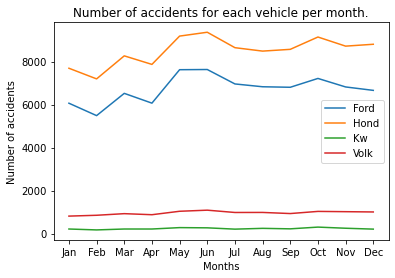

In [22]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(months, ford, 
	label = "Ford")
plt.plot(months, hond, 
	label = "Hond")
plt.plot(months, kw, 
	label = "Kw")
plt.plot(months, volk, 
	label = "Volk")
plt.xlabel("Months")
plt.ylabel("Number of accidents")
plt.title("Number of accidents for each vehicle per month.")
plt.legend()
plt.show()


In [23]:
vehicleTypes.VEHICLE_TYPE.unique()

array(['Pick-up Truck', 'Sedan', 'Station Wagon/Sport Utility Vehicle',
       'Bus', 'Concrete Mixer', 'Box Truck', 'Van', 'Taxi', 'Ambulance',
       'Carry All', 'Chassis Cab', nan, 'Dump', 'PK',
       'Tractor Truck Diesel', 'USPS', 'Motorcycle', 'Convertible',
       'UTILI', 'AMBUL', 'Flat Bed', 'Tow Truck / Wrecker',
       'Tractor Truck Gasoline', 'EMS B', '3-Door', 'School Bus', 'FDNY',
       'Flat Rack', 'Stake or Rack', 'Garbage or Refuse', 'Armored Truck',
       'AMB', 'Tanker', 'Motorscooter', 'Beverage Truck', 'TRUCK',
       'Motorbike', 'DUMP', 'Pickup with mounted Camper',
       'Refrigerated Van', 'RV', 'Moped', 'Lift Boom', 'TOW T', 'AMBU',
       'FEDEX', 'PSD', 'ABULA', 'Van Camper', 'ACCES', 'PASSE', 'subn',
       'van', 'Snow Plow', 'SELF', 'Lunch Wagon', 'nycta', 'Ambul',
       '4 dr sedan', 'FLAT', 'VAN`', 'UTIL', 'COMME', 'DELIV', 'FLLET',
       'Truck', 'WHITE', 'VAN A', 'EMS A', 'Liver', 'Vanette', 'VAN C',
       'PAS', 'SUV', 'Log', 'Bulk Agricultu

In [24]:
#importing regular expressions library
import re
#Function for modifying vehicle types
def Modify_Vehicle_Types(vehicle_name):
  lower_vehicle_name=str(vehicle_name).lower()
  if re.search('.*sedan.*',lower_vehicle_name):
    return 'Sedans'
  elif re.search('.*sport.*',lower_vehicle_name):
    return 'Sport Utility Vehicle'
  elif re.search('.*truck.*',lower_vehicle_name):
    return 'Truck'
  elif lower_vehicle_name=='taxi':
    return 'Taxi'
  elif re.search('.*van.*',lower_vehicle_name):
     return 'Van'
  elif re.search('.*bike.*',lower_vehicle_name):
     return 'Bike'
  elif re.search('.*bus.*',lower_vehicle_name):
     return 'Bus'
  elif re.search('.*motor.*',lower_vehicle_name):
     return 'Motorcycle'
  elif re.search('.*usps.*',lower_vehicle_name):
     return 'USPS' 
  elif re.search('.*amb.*',lower_vehicle_name):
    return 'Ambulance'
#applying the above function to the 'VEHICLE_TYPE' column  
vehicleTypes['VEHICLE_TYPE']=vehicleTypes['VEHICLE_TYPE'].apply(Modify_Vehicle_Types)
#Dropping the NAN values
problemThreeDataset=vehicleTypes.dropna(subset=['VEHICLE_TYPE'])

C:\Users\Rahul Penumadu\AppData\Local\Temp\ipykernel_38180\2883269776.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicleTypes['VEHICLE_TYPE']=vehicleTypes['VEHICLE_TYPE'].apply(Modify_Vehicle_Types)


In [25]:
#Printing the unique Vehicle Types after preprocessing
problemThreeDataset.VEHICLE_TYPE.unique()

array(['Truck', 'Sedans', 'Sport Utility Vehicle', 'Bus', 'Van', 'Taxi',
       'Ambulance', 'USPS', 'Motorcycle', 'Bike'], dtype=object)

In [26]:
#Using groupby function for grouping the data frame by vehicle_type
analysisThreeDataset=vehicleTypes.groupby(['VEHICLE_TYPE']).agg({'VEHICLE_TYPE': np.size})

In [27]:
analysisThreeDataset

,VEHICLE_TYPE
VEHICLE_TYPE,
Ambulance,1508
Bike,32
Bus,1592
Motorcycle,650
Sedans,92955
Sport Utility Vehicle,76279
Taxi,5447
Truck,12532
USPS,6


In [28]:
#Calculating the percentages of accidents for each vehicle_type
analysisThreeDataset['Percentage'] = round((analysisThreeDataset['VEHICLE_TYPE'] / analysisThreeDataset['VEHICLE_TYPE'].sum()) * 100 ,2)


Creating a pie chart

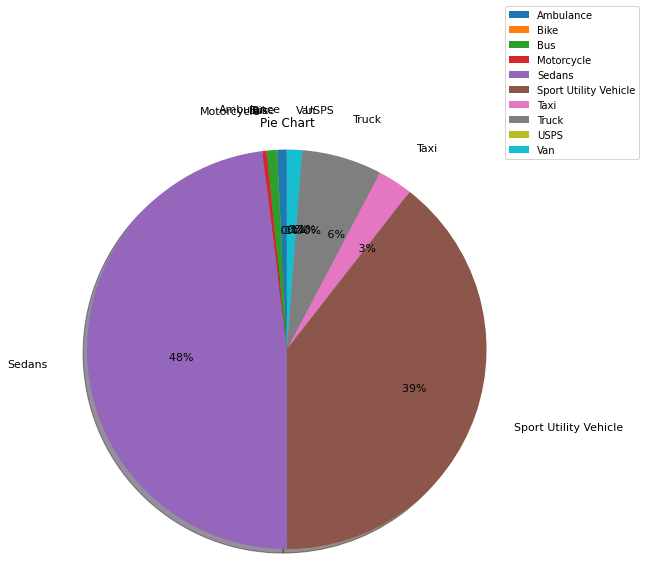

In [29]:
import matplotlib.pyplot as plt
plt.pie(analysisThreeDataset.Percentage.tolist(), labels=analysisThreeDataset.index.tolist(),autopct='%10.0f%%', explode=None,shadow=True, startangle=90,textprops={'fontsize': 11},labeldistance = 1.2)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Pie Chart')
plt.axis('equal')
plt.legend(loc='best',labels=analysisThreeDataset.index.tolist(),bbox_to_anchor=(1.3,1.3))
plt.show()

